In [1]:
## ProductionTank 2305 - 20 Tonne Capacity 

## Importing all the necessary libraries

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [3]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [4]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [5]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

### Filter the ProductionTank df to show only 23MT04 production results

In [6]:
ProductionTank2305_df= ProductionTank.query('Tank_1 == "%s"' % 2305)
print(ProductionTank2305_df) 

      Material    BATCHID Tank_1  \
1966   1397022  107899895   2305   
1967   1397022  107899895   2305   
1968   1397022  107899895   2305   
1969   1397022  107899895   2305   
1970   1397022  107899895   2305   
...        ...        ...    ...   
8004   1775253  108084747   2305   
8005   1775253  108084747   2305   
8006   1775253  108084747   2305   
8007   1775253  108084747   2305   
8008   1775253  108084747   2305   

                                       Instruction_Step INGRED_ID  \
1966                               S3_BATCH_IN_PROGRESS       NaN   
1967                                         GUM_PROMPT       NaN   
1968  PROCEED WHEN SAMPLE IS DEAREATED AND DENSITY I...       NaN   
1969                                         STEP1_CONS   1002565   
1970                        PLEASE VERIFY BULK ADDITION       NaN   
...                                                 ...       ...   
8004                                    STEP2_AGITATION       NaN   
8005           

### Filter the ProductionTank2305_df by Material and Material_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2305

In [7]:
# Group by the 'Material','Material_Name' column
#grouped = ProductionTank2305_df.groupby(['Material'])

#grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

### Aggregation of data per tank : by Material

In [8]:
#Aggregate data per tank
aggregated_ProductionTank2305_df = ProductionTank2305_df.groupby(['Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2305_df)

### Aggregation of data per tank : by BATCHID

In [9]:
#Aggregate data per tank
aggregated_ProductionTank2305_df1 = ProductionTank2305_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2305_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548331   1567195              95       4.000000           1.000000   
1   107553570   1698522             382       5.176471         104.368421   
2   107569832   1775253             650     155.666667           0.800000   
3   107569833   1775253             167       1.666667           4.400000   
4   107579750   1520984             412      10.875000         146.666667   
5   107591051   1520984             525      17.437500          31.333333   
6   107591052   1775253              83       0.333333          19.333333   
7   107593359   1428047             174       0.000000           0.400000   
8   107599385   1775253             698      29.000000         128.176471   
9   107618351   1775253            1084      50.250000         187.833333   
10  107622258   1698522             179       4.000000           0.800000   
11  107641913   1567195             142      15.666667           1.333333   

### Data Visualisation 

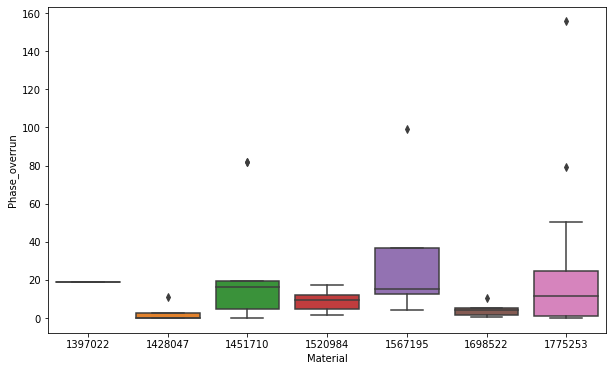

In [10]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2305_df1, x='Material', y='Phase_overrun')
plt.show()

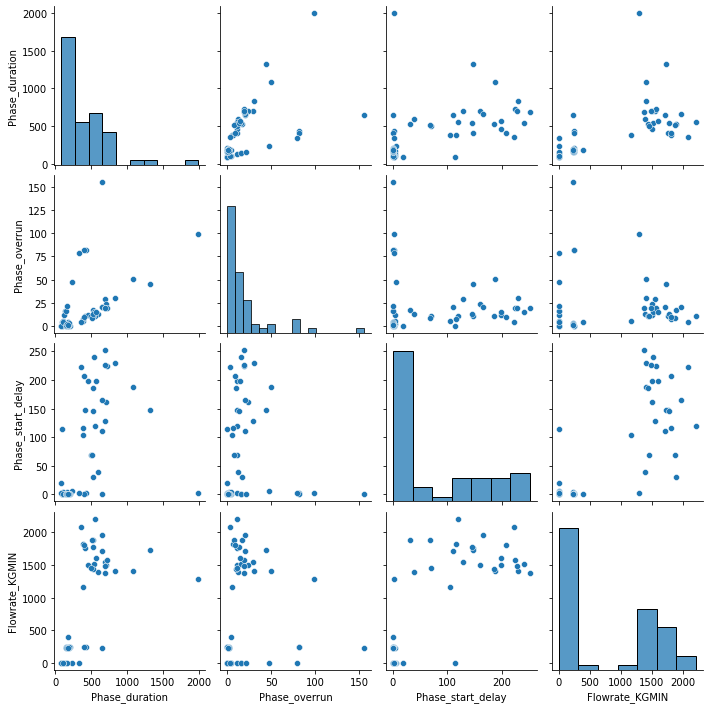

In [11]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2305_df1[numeric_columns])
plt.show()

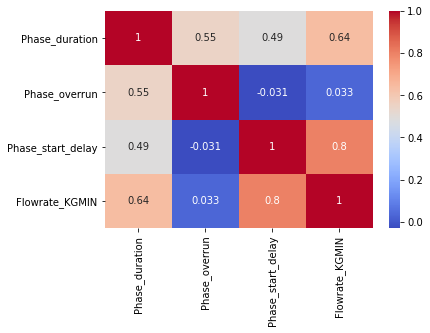

In [12]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2305_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
aggregated_ProductionTank2305_df1.info

<bound method DataFrame.info of       BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548331   1567195              95       4.000000           1.000000   
1   107553570   1698522             382       5.176471         104.368421   
2   107569832   1775253             650     155.666667           0.800000   
3   107569833   1775253             167       1.666667           4.400000   
4   107579750   1520984             412      10.875000         146.666667   
5   107591051   1520984             525      17.437500          31.333333   
6   107591052   1775253              83       0.333333          19.333333   
7   107593359   1428047             174       0.000000           0.400000   
8   107599385   1775253             698      29.000000         128.176471   
9   107618351   1775253            1084      50.250000         187.833333   
10  107622258   1698522             179       4.000000           0.800000   
11  107641913   1567195             142     

In [14]:
# Handling missing values
aggregated_ProductionTank2305_df1.dropna(inplace=True)  # Remove rows with missing values

In [15]:
# Handling duplicates
aggregated_ProductionTank2305_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [16]:
print(aggregated_ProductionTank2305_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
1  107553570   1698522             382       5.176471         104.368421   
2  107569832   1775253             650     155.666667           0.800000   
3  107569833   1775253             167       1.666667           4.400000   
4  107579750   1520984             412      10.875000         146.666667   
5  107591051   1520984             525      17.437500          31.333333   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
1       1155.8386              16.473684       169.394162  
2        223.1420              38.600000       237.850400  
3        223.1702              36.000000       237.850400  
4       1767.2573              14.388889       263.857629  
5       1882.8770              15.055556       270.812300  


In [17]:
# Define columns where you want to detect and remove outliers
ProductionTank2305_df = pd.DataFrame(aggregated_ProductionTank2305_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2305_df = remove_outliers_iqr(ProductionTank2305_df, col)

# Display the cleaned DataFrame
print(ProductionTank2305_df)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
3   107569833   1775253             167       1.666667           4.400000   
7   107593359   1428047             174       0.000000           0.400000   
12  107650388   1775253             834      30.000000         228.750000   
13  107659907   1775253             703      23.500000         160.500000   
21  107734577   1775253             203       0.000000           0.600000   
25  107765823   1520984             197       1.333333           0.600000   
26  107771594   1428047             179       0.000000           0.800000   
27  107771598   1775253             648      19.833333         110.250000   
28  107781795   1775253            1318      44.666667         147.076923   
29  107790572   1775253             384       7.222222         116.100000   
36  107833744   1775253             182       0.000000           0.800000   
39  107845580   1775253             533      13.222222         146.050000   

In [18]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2305_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2305_df.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  4.100000e+01  4.100000e+01       41.000000      41.000000   
mean   1.077817e+08  1.636740e+06      509.292683      21.194255   
std    1.462919e+05  1.486813e+05      352.978983      31.513633   
min    1.075536e+08  1.397022e+06      150.000000       0.000000   
25%    1.076599e+08  1.451710e+06      197.000000       2.666667   
50%    1.077818e+08  1.698522e+06      493.000000      11.000000   
75%    1.078565e+08  1.775253e+06      650.000000      19.833333   
max    1.080847e+08  1.775253e+06     1995.000000     155.666667   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          41.000000       41.000000              41.000000   
mean           96.080785     1120.656283              23.589644   
std            91.263252      703.955846              11.262333   
min             0.400000      222.856900              11.450000   
25%          

In [19]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2305_df[numerical_cols] = scaler.fit_transform(ProductionTank2305_df[numerical_cols])
print(ProductionTank2305_df.head())

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
3   107569833   1775253       -0.756733      -0.630372          -0.820360   
7   107593359   1428047       -0.733707      -0.766669          -0.866653   
12  107650388   1775253        1.437316       1.686671           1.776110   
13  107659907   1775253        1.006401       1.155114           0.986232   
21  107734577   1775253       -0.638314      -0.766669          -0.864339   

    Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
3        -0.902946                  36.00       237.850400  
7        -0.879982                  38.80       237.850400  
12        0.657277                  15.45       247.907363  
13        0.779380                  15.45       247.907363  
21       -0.877647                  43.80       237.850400  


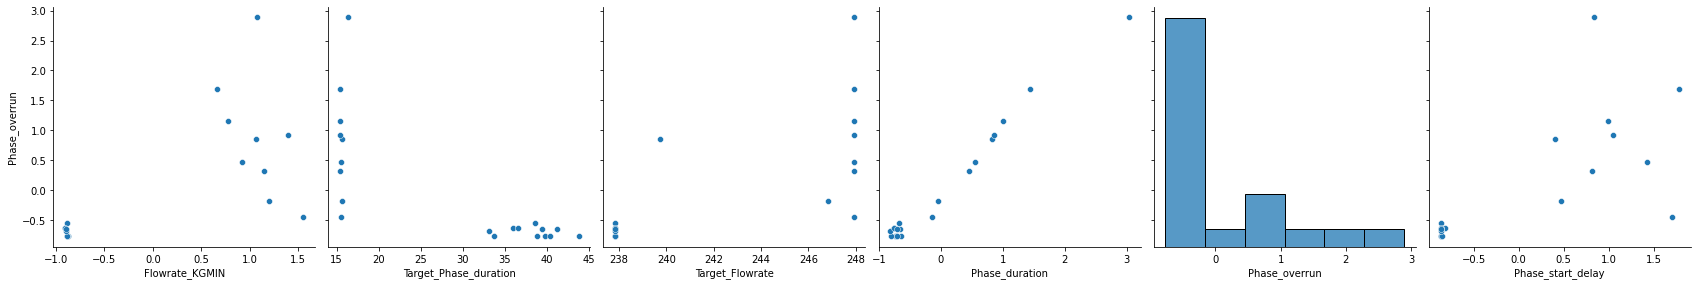

In [20]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2305_df, x_vars=['Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

In [21]:
#pip install lightgbm

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank2304_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2305_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2305results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           | 0.00584665  | 0.00587764 |   0.994851 |  0.976861 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            | 0.0159934   | 0.0182694  |   0.985914 |  0.928076 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            | 0.405069    | 0.610852   |   0.643238 | -1.40483  |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.0727272   | 0.00223085 |   0.935946 |  0.991217 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost

In [23]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.051978
  Std MSE: 0.033440

Ridge:
  Mean MSE: 0.071969
  Std MSE: 0.067491

Lasso:
  Mean MSE: 0.445708
  Std MSE: 0.521727

RandomForestRegressor:
  Mean MSE: 0.299357
  Std MSE: 0.333140

GradientBoostingRegressor:
  Mean MSE: 0.285311
  Std MSE: 0.338782

SVR:
  Mean MSE: 1.301554
  Std MSE: 1.132591

MLPRegressor:
  Mean MSE: 6438943369457.059570
  Std MSE: 2510389644731.081543

DecisionTreeRegressor:
  Mean MSE: 0.163748
  Std MSE: 0.165973

AdaBoostRegressor:
  Mean MSE: 0.286653
  Std MSE: 0.396445

BaggingRegressor:
  Mean MSE: 0.283748
  Std MSE: 0.324387



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2304_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2305_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)


# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2305 TUN results.xlsx', index=False)

+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           |  0.00584665 | 0.00587764 |   0.994851 |  0.976861 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            |  0.00584872 | 0.00585579 |   0.994849 |  0.976947 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            |  0.00828233 | 0.00492884 |   0.992705 |  0.980596 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     |  0.0506519  | 0.00596315 |   0.955389 |  0.976524 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost